In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [2]:
scalar = torch.tensor(3.1415)
vector = torch.tensor([1, 2, 3])
matrix = torch.tensor([[1, 2], [3, 4], [5, 6]])
tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
random_image = torch.rand(size=(224, 224, 3))

In [3]:
print('scalar =', scalar)
print(scalar.shape)
print(scalar.ndim)
print('----------------')
print('vector =', vector)
print(vector.shape)
print(vector.ndim)
print('----------------')
print('matrix =', matrix)
print(matrix.shape)
print(matrix.ndim)
print('----------------')
print('tensor =', tensor)
print(tensor.shape)
print(tensor.ndim)
print('----------------')
print('random_image =', random_image)
print(random_image.shape)
print(random_image.ndim)
print('----------------')

scalar = tensor(3.1415)
torch.Size([])
0
----------------
vector = tensor([1, 2, 3])
torch.Size([3])
1
----------------
matrix = tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
2
----------------
tensor = tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])
3
----------------
random_image = tensor([[[0.4942, 0.7727, 0.1600],
         [0.3049, 0.4958, 0.2932],
         [0.3576, 0.8403, 0.9825],
         ...,
         [0.8741, 0.6460, 0.6203],
         [0.6129, 0.9707, 0.5171],
         [0.0403, 0.8977, 0.9275]],

        [[0.8084, 0.0121, 0.8712],
         [0.1635, 0.8234, 0.3544],
         [0.8007, 0.3491, 0.2263],
         ...,
         [0.9629, 0.7847, 0.0551],
         [0.2171, 0.0941, 0.2147],
         [0.5599, 0.5644, 0.6471]],

        [[0.2039, 0.2979, 0.9221],
         [0.6898, 0.1678, 0.7375],
         [0.2626, 0.6431, 0.8670],
         ...,
         [0.9220, 0.6124, 0.9517],
         [0.5201, 0.9243, 0.4249],
      

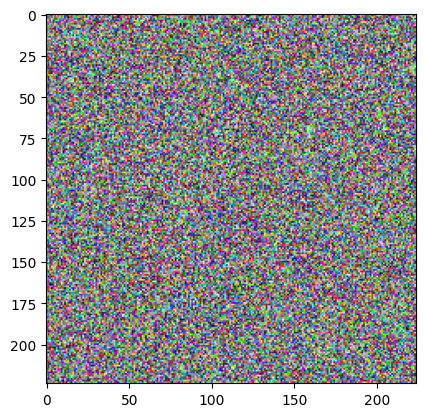

In [4]:
# show image
plt.imshow(random_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99982476..8.999992].


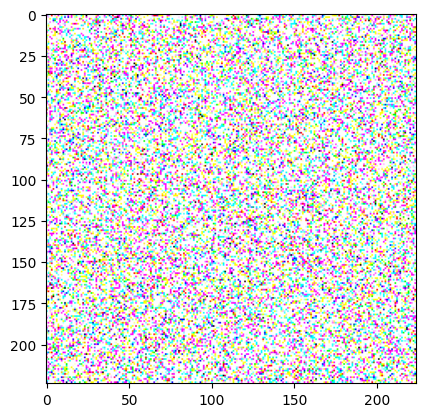

In [5]:
plt.imshow(random_image*10-1)

# Matrix Multiplication

### Dot Product (Elementwise Multiplication) & Matrix Multiplication

In [6]:
mat_a = torch.tensor([[1, 2], [3, 4]])
mat_b = torch.tensor([[5, 6, 9], [7, 8, 12]])
%time
# mat_a*mat_b
mat_a@mat_b # matrix multiplication

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 4.29 μs


tensor([[19, 22, 33],
        [43, 50, 75]])

# Min, Max, etc

In [7]:
vec_a = torch.tensor([1.0, 2, 3])
print(torch.min(vec_a))
print(torch.max(vec_a))
print(torch.mean(vec_a)) # Not the same as np.mean because it returns a tensor and it wont be converted to a float by default

tensor(1.)
tensor(3.)
tensor(2.)


In [8]:
vec_a.argmax() # returns the index of the maximum value

tensor(2)

In [9]:
vec_b = torch.arange(10, 100, 10).type(torch.float16)
vec_b.dtype

torch.float16

# Reshaping, stacking, squeezing and unsqueezing

In [10]:
torch.stack([vec_a, vec_a]) # stack tensors along a new dimension

tensor([[1., 2., 3.],
        [1., 2., 3.]])


How about removing all single dimensions from a tensor?

To do so you can use torch.squeeze() (I remember this as squeezing the tensor to only have dimensions over 1).
Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])

And to do the reverse of torch.squeeze() you can use torch.unsqueeze() to add a dimension value of 1 at a specific index.
Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])

In [11]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# Reproducibility (trying to take the random out of random)

### Let's make some random but reproducible tensors

In [16]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_A = torch.rand(3, 3)
torch.manual_seed(RANDOM_SEED)
random_tensor_B = torch.rand(3, 3)
print(random_tensor_A)
print(random_tensor_B)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])


# GPU Use from PyTorch

In [17]:
torch.cuda.is_available() # check if cuda is available

True

In [18]:
tensor_A = torch.tensor([[1, 2], [3, 4]], device='cuda')

In [19]:
tensor_A.device

device(type='cuda', index=0)